DOMAIN: Semiconductor manufacturing process

The data consists of 1567 datapoints each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

• PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import and Understand the data**

**A.Import ‘signal-data.csv’ as DataFrame.**

In [ ]:
signal=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/FMT/signal-data.csv')

In [ ]:
#copy of original dataset
signal1=signal.copy(deep=True)

In [ ]:
print(signal)

                     Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8  ...       581     582     583     58

In [ ]:
signal.dtypes.value_counts()

float64    590
object       1
int64        1
Name: count, dtype: int64

**B.Print 5 point summary and share at least 2 observations.**

In [ ]:
signal.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


Insights: The 5-point summary for feature **586, 587, 589** can be analysed based on their **spread, central tendency and variation**.

feature: 586-

1. spread: The data range in this feature is relatively small with the spread between -0.0169 to 0.1028.

2. central tendency: The median (0.0205) is close to mean (0.0214)indicating symmetric distribution.

3. Variation: The SD (0.012) indicated a moderate variability with mean.

feature: 587-

1. spread: The data range in this feature is relatively small with the spread between .0032 to 0.079.

2. central tendency: The median (0.014) is below to mean (0.016)indicating slight right skew distribution.

3. Variation: The low SD indicated a low variability with col 586.

feature: 589-

1. spread: The data range in this feature is relatively small with the spread between 0.000 to approx 737.

2. central tendency: The median (71.9) is low to mean (99.67)indicating highly right skewed distribution.

3. Variation: The SD (93.89) indicated a high variability around mean.


In [ ]:
#dropping the Time column has it has no predictive value
signal.drop(['Time'], axis=1, inplace=True)

### **Data Cleansing**

**A.Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.**

In [ ]:
np.array(signal.isnull().sum())

array([   6,    7,   14,   14,   14,   14,   14,    9,    2,    2,    2,
          2,    2,    3,    3,    3,    3,    3,    3,   10,    0,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    1,
          1,    1,    1,    1,    1,    1,    1,   24,   24,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    4,    4,
          4,    4,    4,    4,    7,    6,    6,    6,    7,    7,    7,
          6,    6,    6,    6,    6,    6,  794,  794,    6,   24,   24,
         24,   24,   24,   24,   24,   24,    1,   12, 1341,    0,    0,
          0,   51,   51,    6,    2,    2,    6,    6,    6,    6,    6,
          6,    6,    6,    6,    2,    2,    6,    6,    6,    6, 1018,
       1018, 1018,  715,    0,    0,    0,    0,    0,   24,    0,    0,
          9,    9,    9,    9,    9,    9,    9,    9,    9,    9,    9,
          8,    8,    8,    5,    6,    7,   14,   14,   14,   14,   14,
          9,    2,    2,    2,    2,    2,    3,   

There are features with 20%+ null values.

In [ ]:
#Create a threshold of 20%

threshold=0.2*len(signal)
features_to_drop=[]

#find the features/columns to be dropped ie., with 20% +null values using for loop
for column in signal.columns:
    if signal[column].isnull().sum()> threshold:
       features_to_drop.append(column)
signal.drop(columns=features_to_drop, inplace=True)


#Imputing the null values with less than 20% with mean using for loop
for column in signal.columns:
    if signal[column].isnull().sum()> 0:
       mean=signal[column].mean()
signal.fillna(mean, inplace=True)

In [ ]:
signal.shape

(1567, 559)

**B.Identify and drop the features which are having same value for all the rows.**

In [ ]:
#list of features beforing dropping
columns_before=signal.columns.tolist()

#checking for features having same values for all the rows
column_to_drop=[column for column in signal.columns if signal[column].nunique()==1]


#dropping identified columns
signal.drop(index=column_to_drop, inplace=True)

#list after dropping
columns_after=signal.columns.tolist()

#To see what columns got dropped
dropped_columns=list(set(columns_before)-set(columns_after))

#printing to see the dropped columns
print('columns_before:', np.array(columns_before).shape)
print('columns_after:', np.array(columns_after).shape)
print('dropped columns:', dropped_columns)



columns_before: (559,)
columns_after: (559,)
dropped columns: []


Insights: we see that no features are having the same values for all the rows and it is reflected in columns_before (559) and columns_after(559).

**C.Drop other features if required using relevant functional knowledge. Clearly justify the same.**

Low variance features provide no to little importance when model building and can unnecessarily complicate the model building, causing overfitting and decreasing computational efficiency. To enhance the performance of the model, features with low variance can be removed. Like keeping the threshold to 0.01 and those features with variance less than threshold can be dropped.

Steps: Find the variance of the dataset, set the low threshold, check for features with varaince< threshold set and finally drop those features.

In [ ]:
variance=signal.drop(columns=['Pass/Fail']).var()
print(variance)

0       37826.328329
1       31987.082216
2       39968.941888
3      208245.192589
4        3228.314768
           ...      
585        18.749470
586         6.337003
587         6.337562
588         6.338916
589      8810.063098
Length: 558, dtype: float64


In [ ]:
#setting threshold to 0.01
low_v_threshold=0.01

# getting features with low variance threshold
low_v_threshold_columns=variance[variance<low_v_threshold].index

#print columns with low_v_threshold
print(low_v_threshold_columns)

Index(['5', '20', '86', '87', '113', '114', '116', '119', '156', '221', '222',
       '248', '249', '251', '254', '291', '359', '360', '386', '387', '389',
       '392', '393', '575'],
      dtype='object')


In [ ]:
signal.drop(columns=low_v_threshold_columns, inplace=True)
signal.shape

(1567, 535)

**D.Check for multi-collinearity in the data and take necessary action.**

To drop features further more from 535 columns which affects the model performance due to curse of dimensionality, multicollinearity Variance infaltion factor can be used. Variance inflation factor measures the correlation among independent variables with least square regression models.

VIF= ${\frac{1}{(1- {R^2})}}$

Setting the threshold of VIF=5 and those above this threshold can be deleted as VIF=5 give good and a relaible multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
target_column=['Pass/Fail']
signal_without_dropped=signal.drop(columns=target_column, errors='ignore')

#VIF Intialization
vif_data=pd.DataFrame()
vif_data['feature']=signal_without_dropped.columns


#calculating vif for each feature
vif_data['VIF']=[variance_inflation_factor(signal_without_dropped.values, i)
                  for i in range(len(signal_without_dropped.columns))]
print(vif_data)

    feature            VIF
0         0      11.853329
1         1       8.099831
2         2    1225.573330
3         3      11.285061
4         4   41762.835531
..      ...            ...
529     585    1705.105936
530     586   99231.282341
531     587  316630.646858
532     588  328737.333171
533     589       2.789576

[534 rows x 2 columns]


In [ ]:
#set threshold to drop high vif data

threshold=5
high_vif_features=vif_data[vif_data['VIF']> threshold]['feature'].tolist()

signal_reduced=signal.drop(columns=high_vif_features)

print(signal_reduced.head())

        23       24     40         88       418       419     429      432  \
0 -4043.75   751.00  61.29  1747.6049  525.0965    0.0000  3.6084  26.3617   
1 -3498.75 -1640.25  78.25  1931.6464    0.0000  368.9713  3.1595   8.4887   
2 -4047.00 -1916.50  14.37  1685.8514    0.0000    0.0000  3.5220  18.7546   
3 -4515.00 -1657.25  76.90  1752.0968  317.7362    0.0000  4.9898  76.0354   
4 -3987.50   117.00  76.39  1828.3846    0.0000  866.0295  3.8754  43.8119   

        433      438  ...       500       510       511     520  521     523  \
0   49.0013  44.5055  ...    0.0000   64.6707    0.0000  1.9864  0.0  0.1094   
1  199.7866  48.5294  ...    0.0000  141.4365    0.0000  1.6292  0.0  0.0673   
2  109.5747  60.0000  ...    0.0000  240.7767  244.2748  2.9626  0.0  0.0751   
3  181.2641  34.0336  ...  711.6418  113.5593    0.0000  2.4416  0.0  0.0977   
4    0.0000  25.3521  ...    0.0000  148.0663    0.0000  2.5512  0.0  0.0616   

      526     571         589  Pass/Fail  
0  0.50

In [ ]:
signal_reduced['Pass/Fail']=signal_reduced['Pass/Fail'].replace({-1:0, 1:1})

print(signal_reduced)

           23       24     40         88         418         419     429  \
0    -4043.75   751.00  61.29  1747.6049  525.096500    0.000000  3.6084   
1    -3498.75 -1640.25  78.25  1931.6464    0.000000  368.971300  3.1595   
2    -4047.00 -1916.50  14.37  1685.8514    0.000000    0.000000  3.5220   
3    -4515.00 -1657.25  76.90  1752.0968  317.736200    0.000000  4.9898   
4    -3987.50   117.00  76.39  1828.3846    0.000000  866.029500  3.8754   
...       ...      ...    ...        ...         ...         ...     ...   
1562 -6228.25   356.00  81.21  1869.4215  708.665700  984.615400  1.2706   
1563 -3675.50   339.00  79.43  1872.5133  764.081600  612.332400  5.8047   
1564 -4102.00 -1226.00  82.03  1820.3629   99.670066   99.670066  3.2772   
1565 -4001.50   394.75  81.13  1627.4714  470.750600    0.000000  1.5785   
1566 -3951.75  -425.00  80.45  1759.9908   99.670066   99.670066  2.4978   

           432       433      438  ...       500       510       511     520  \
0      

**E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.**

Furthermore Features can be dropped based on their Mutual Information Gain. Features w.r.t target varaible if they have MIF to be zero can be dropped.As they indicate no dependency with target variable. These done provide any information about the target.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
X=signal_reduced.drop(columns=['Pass/Fail'])
y=signal_reduced['Pass/Fail']

mi=mutual_info_classif(X,y)

mi_df=pd. DataFrame({'Feature':X.columns, 'Mutual_info': mi})

print(mi_df)

   Feature  Mutual_info
0       23     0.000000
1       24     0.004219
2       40     0.021800
3       88     0.012705
4      418     0.000000
5      419     0.000000
6      429     0.004588
7      432     0.007434
8      433     0.003879
9      438     0.000000
10     468     0.005649
11     482     0.000784
12     483     0.005146
13     484     0.000000
14     485     0.003250
15     486     0.000000
16     487     0.003896
17     488     0.004573
18     489     0.008436
19     493     0.000000
20     494     0.005635
21     499     0.000000
22     500     0.003343
23     510     0.018906
24     511     0.006398
25     520     0.000000
26     521     0.004514
27     523     0.000000
28     526     0.010237
29     571     0.025820
30     589     0.025008


In [ ]:
zero_mi_features_drop=mi_df[mi_df['Mutual_info']==0]['Feature']
signal_select=signal_reduced.drop(columns=zero_mi_features_drop)

signal_select.shape

(1567, 22)

In [ ]:
signal_select.describe().T

,count,mean,std,min,25%,50%,75%,max
24,1567.0,-298.089817,2900.870828,-14804.5000,-1474.37500,-74.0000,1376.25000,14106.000000
40,1567.0,68.391421,24.194595,1.4340,74.84000,78.3100,80.28000,99.670066
88,1567.0,1807.815021,53.537262,1627.4714,1777.47030,1809.2492,1841.87300,2105.182300
429,1567.0,4.171844,6.435390,0.7837,2.57140,3.4538,4.75580,186.616400
432,1567.0,99.368019,126.108109,0.0000,31.03385,58.2876,120.13690,994.285700
433,1567.0,205.384206,225.666315,0.0000,10.04745,150.9788,304.54180,995.744700
468,1567.0,223.616876,230.400319,0.0000,38.88265,148.4407,334.67400,999.877000
482,1567.0,315.068122,280.141483,0.0000,0.00000,288.1426,512.39075,999.413500
483,1567.0,204.927017,191.830790,0.0000,82.41015,145.3318,260.07900,989.473700
485,1567.0,199.558059,217.365268,0.0000,51.18850,110.0575,283.28900,994.000000


### **3. Data Vizualisation and Analysis**

**A.Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.**

**B.Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.**

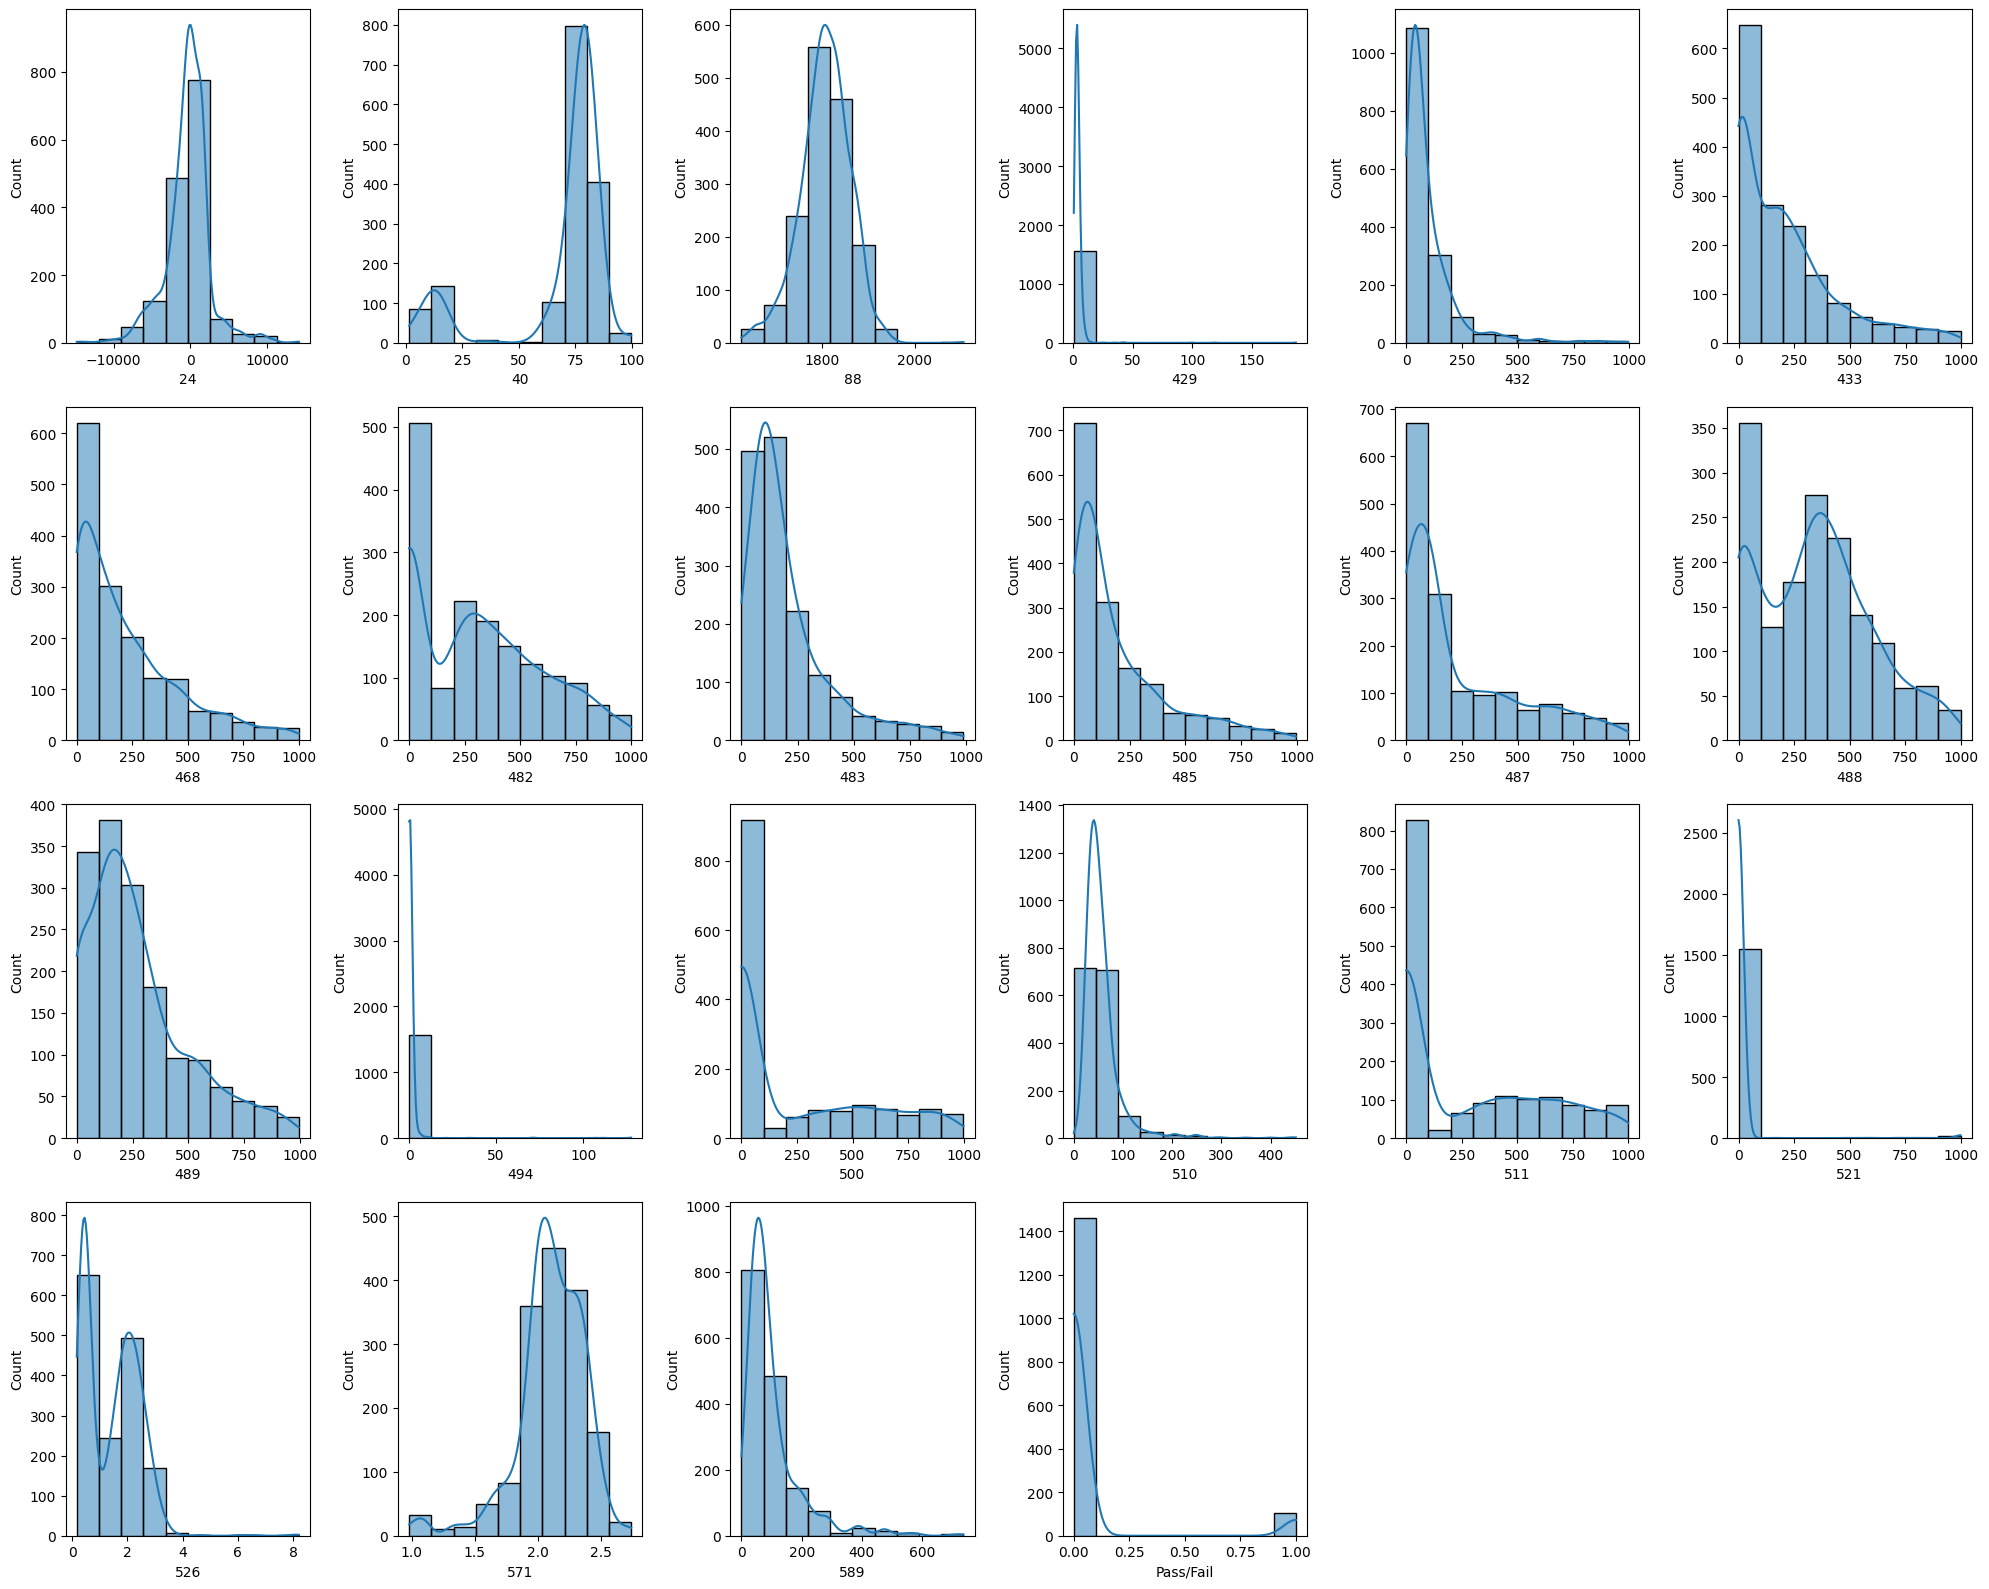

In [ ]:
num_col=signal_select.shape[1]
num_rows=(num_col//6)+1

plt.figure(figsize=(20, num_rows*4))
for i,col in enumerate(signal_select.columns):
   plt.subplot(num_rows, min(num_col, 6), i+1)
   sns.histplot(signal_select[col], bins=10, kde=True)
plt.tight_layout()
plt.show()




From the above plot, it looks like most features of the 20 columns is skewed towards right indicating more instances towards Pass. It indicates class imbalance where one class pass is dominating more, and models trained over imbalance might indicate high bias. There are feature 24, 88 are normally distributed.

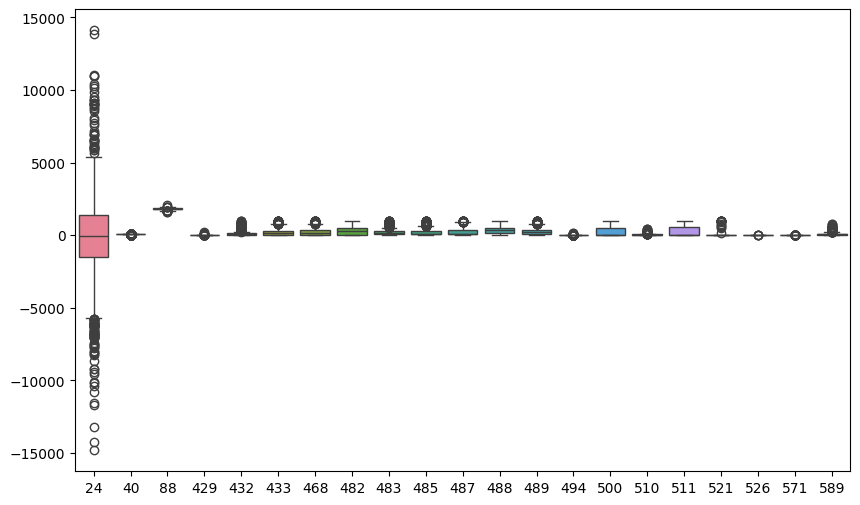

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=signal_select.drop(columns=['Pass/Fail']))
plt.show()

From the box plot we see potiential outliers in the features. methods such as handling outliers can imporve the model performance. Or Model can be choosen in  a way which doesnt get affected by the outliers can be considered.

<Figure size 600x400 with 0 Axes>

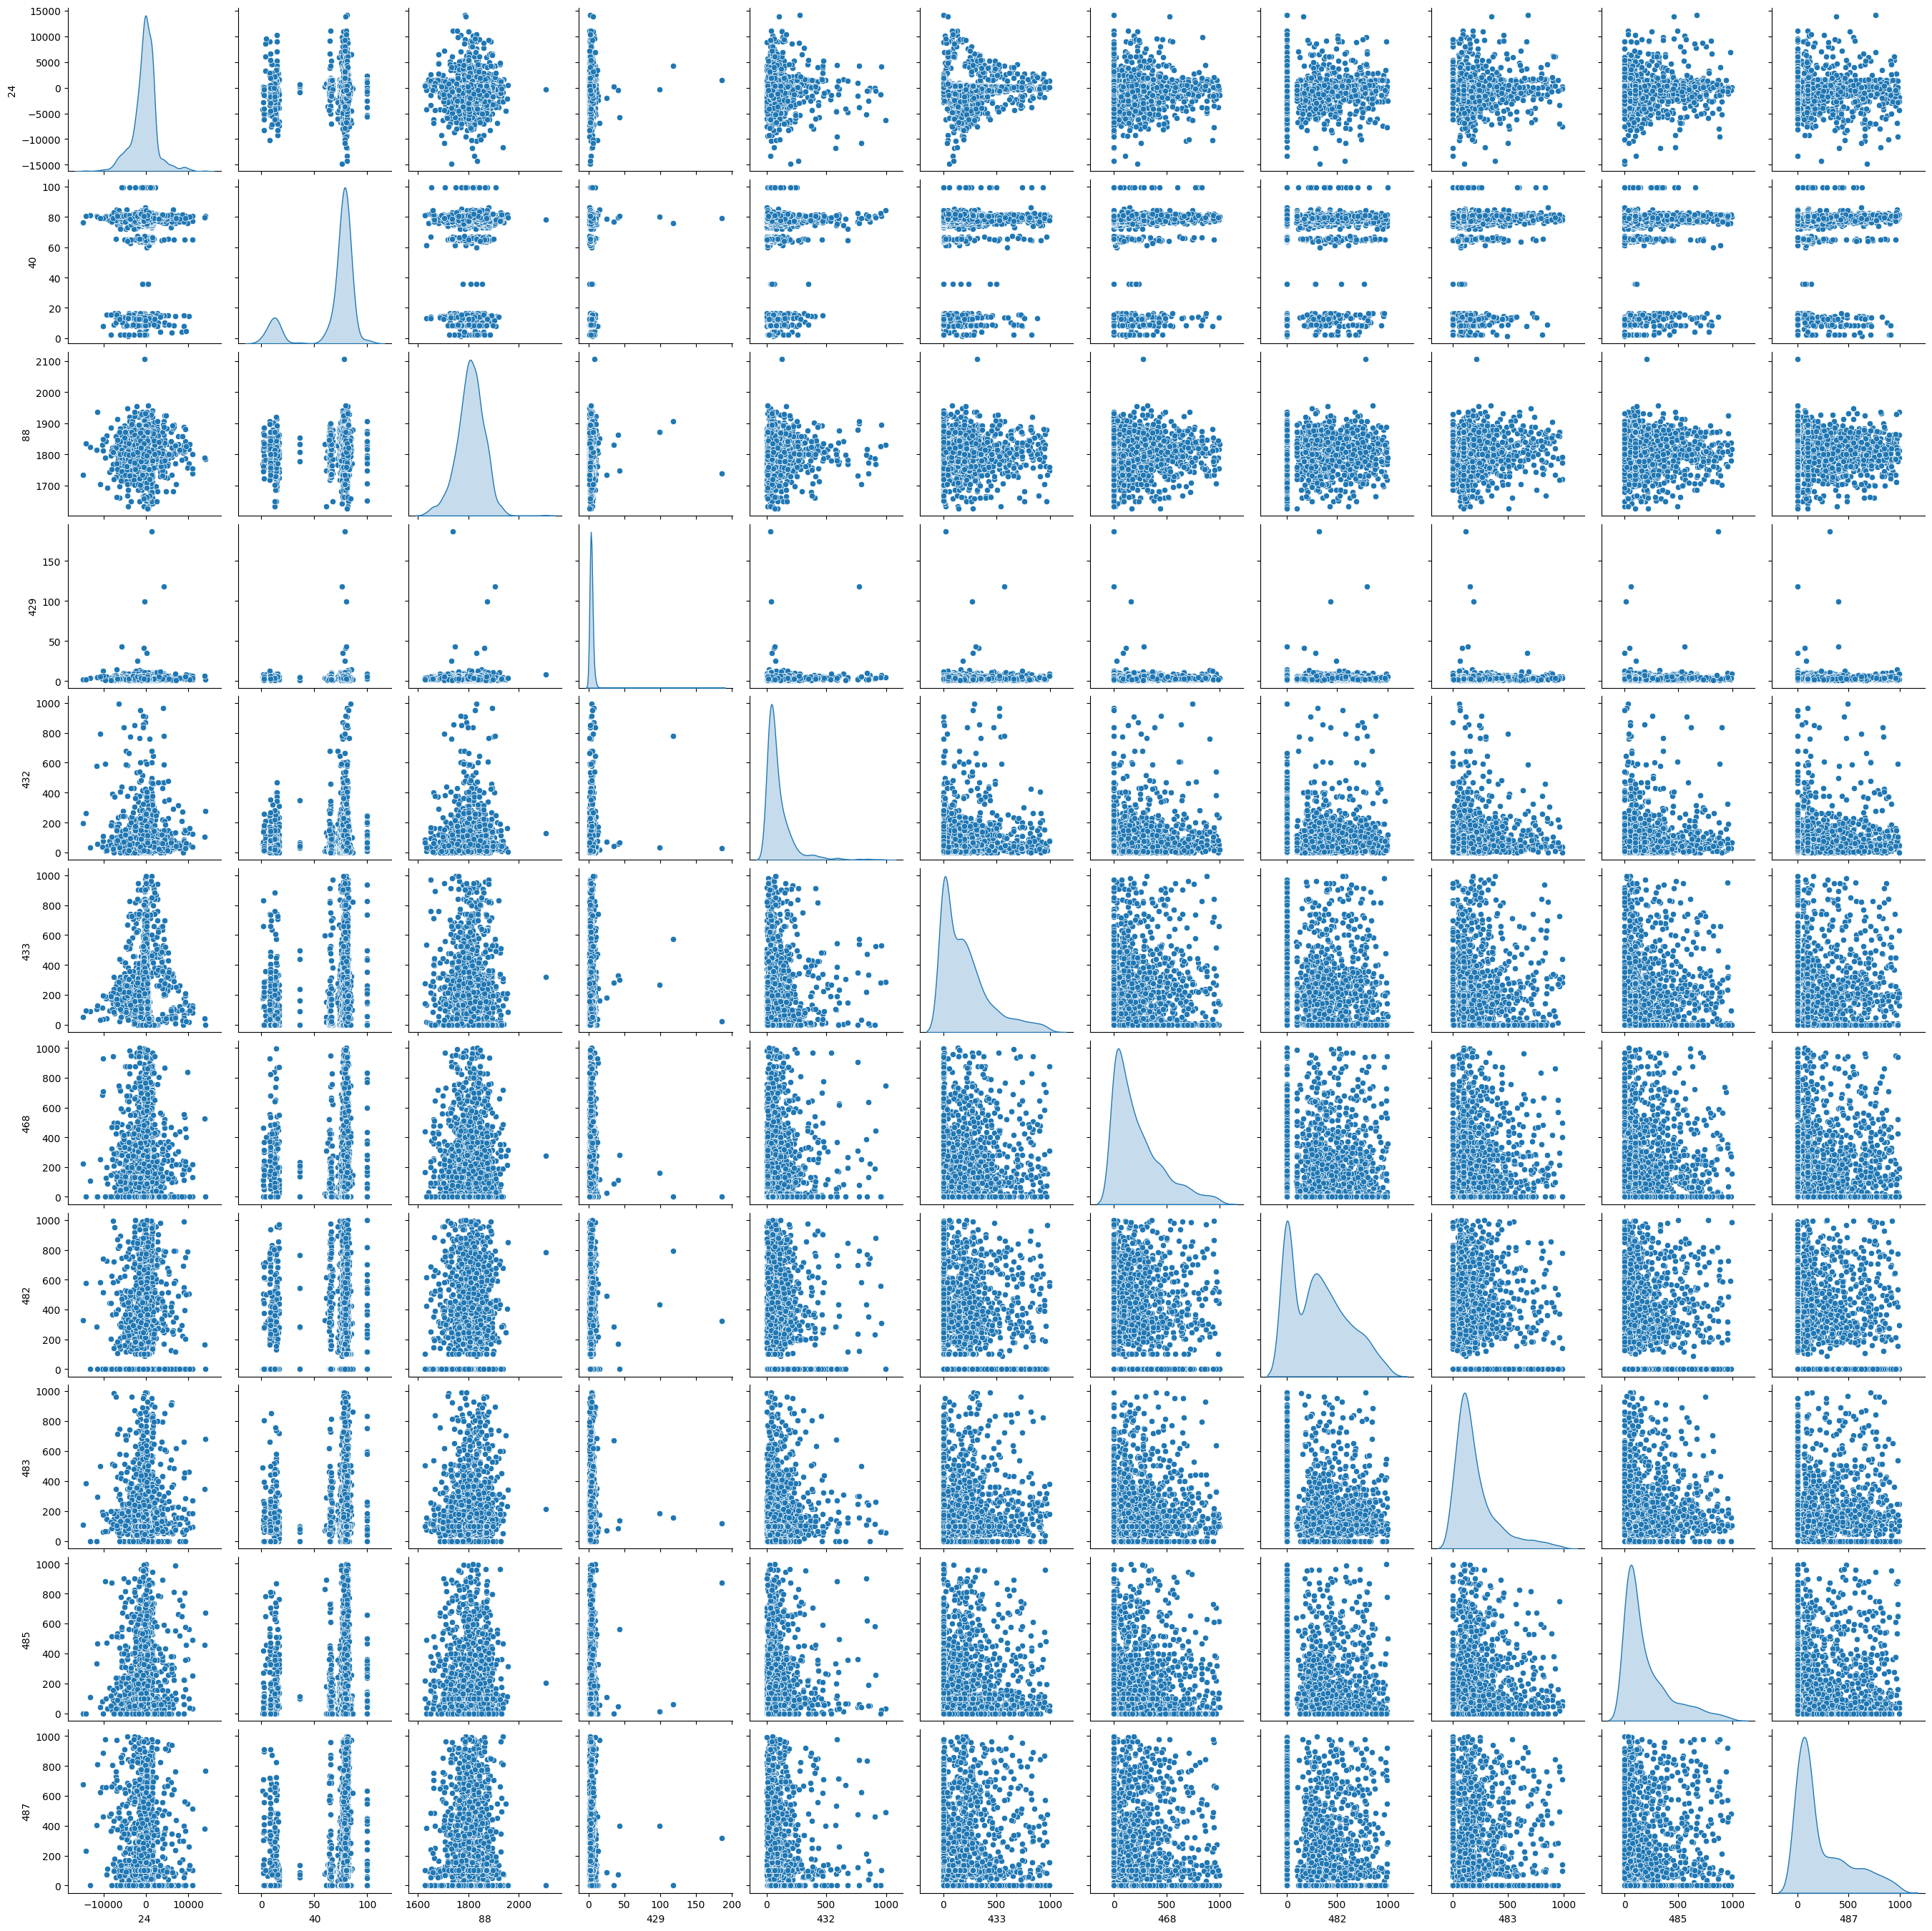

In [ ]:

plt.figure(figsize=(6,4))
sns.pairplot(signal_select.iloc[:, 0:11], diag_kind='kde')
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.pairplot(signal_select.iloc[:, 11:21], diag_kind='kde')
plt.show()

Most features which are upward directly spread indicate the increase in one variable increases anothers but not necessarily linear. Features which are showing circular patterns clearly indicate no linear model but a periodic or cyclic patterns. we also see most features are spread from the lower left corner and spread there on. We also see potential outliers in the data.

In [ ]:
corr_matrix=signal_select.drop(columns=['Pass/Fail']).corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':10})

From heatmap it is seen that the features are not correlated and we see no dependency between the variables.

In [ ]:
#bivariate
fig, axes= plt.subplots(1, 4, figsize=(18, 6))
sns.scatterplot(signal_select, x='589', y= '24', hue= 'Pass/Fail', ax=axes[0])
sns.scatterplot(signal_select, x='433', y= '589', hue= 'Pass/Fail', ax=axes[1])
sns.scatterplot(signal_select, x='468', y= '571', hue= 'Pass/Fail', ax=axes[2])
sns.scatterplot(signal_select, x='468', y= '433', hue= 'Pass/Fail', ax=axes[3])
plt.tight_layout()
plt.show()

From the above few scatter plots between features and hued with target varaible indicate the dominance of Pass Class and a very few Fail Class is seen. While the values are mostly in bulk at the lower left corner and is spread there on. The far away points indicate potential outliers in the data. The datapoints arespread in a manner that has no clear patterns indicating no strong relationship between the data. In the first scatter plot which is spread at the centre indicate that the change in x feature doesnot necessarily change y feature. Like the pairplot the datapoints scattered at the lower left corner indicate the negative trend. The higher one variable the lower is the other variable.

### **4. Data pre-processing:**

**A.Segregate predictors vs target attributes.**

In [ ]:
X1=signal_select.drop(columns=['Pass/Fail'])
Y1=signal_select['Pass/Fail']

**B.Check for target balancing and fix it if found imbalanced.**

**C.Perform train-test split and standardise the data or vice versa if required.**

In [ ]:
Y1.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X1, Y1, test_size=0.3, random_state=42, stratify=Y1)


In [ ]:
#scale the data-StandardScaler
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

***Fixing the imbalance in Y1 after train test split using SMOTE***

In [ ]:
#fixing target imbalance-SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_resample, Y_train_resample=smote.fit_resample(X_train_scaled, Y_train)

In [ ]:
Y_train_resample.value_counts()

**D.Check if the train and test data have similar statistical characteristics when compared with original data.**

In [ ]:
#defining a function to display the statistical characteristsics of the original and train and test data
from scipy.stats import zscore
X2=X1.apply(zscore)
X_train_resample= pd.DataFrame(X_train_resample)
X_test_scaled= pd.DataFrame(X_test_scaled)

def statistical_char_(original, train, test):
    print('original_mean:','\n\n', original.mean(), '\n\n', 'train_mean:', '\n\n', train.mean(),'\n\n', 'test_mean:', '\n\n', test.mean(), '\n\n')
    print('original_std:','\n\n', original.std(), '\n\n', 'train_std:', '\n\n', train.std(), '\n\n', 'test_std:', '\n\n', test.std(), '\n\n')

statistical_char_(X2, X_train_resample, X_test_scaled)

The train and test dataset exhibit a similar mean and SD to the original dataset among most features. variation in few features indicate a slight shift in data distribution from that of the original one, however they may not impact the model during building and training and testing. The other way for checking the statistical characteristics is by Covariate Shift. It refers to situations where predictor varaibles in train and test dont have similar stat.characteristics. If such exists then upon mixing train and test data we should still be in position to classify the origin of the data, thus giving us good accuracy.

### **5. Model training, testing and tuning:**

**A.Use any Supervised Learning technique to train a model.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dtree=DecisionTreeClassifier(criterion='gini', random_state=42)
dtree.fit(X_train_resample, Y_train_resample)

In [ ]:
print('accu-train:', dtree.score(X_train_resample, Y_train_resample))
print('accu-test:', dtree.score(X_test_scaled, Y_test))

DecisionTree on train data is overfitting. Model has to be tuned for better model performance.

**B.Use cross validation techniques.**

**Hint: Use all CV techniques that you have learnt in the course.**

**KFOLD**

In [ ]:
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

kfold=KFold(n_splits=10)
cross_val_result=cross_val_score(dtree, X_train_resample, Y_train_resample, cv=kfold)
print(cross_val_result)

In [ ]:
print(np.mean(abs(cross_val_result)), '\n\n')
print('standard-deviation:', cross_val_result.std())

**LOOCV**

In [ ]:
cross_val_result1=cross_val_score(dtree, X_train_resample, Y_train_resample, cv=LeaveOneOut())
print(cross_val_result1)

In [ ]:
cross_val_result1.std()

**C.Apply hyper-parameter tuning techniques to get the best accuracy.**

In [ ]:
from sklearn.model_selection import GridSearchCV
param={ 'max_depth': range(1, 10),
            'min_samples_split': range(1, 10), 'min_samples_leaf': range(1, 6)}

In [ ]:
dtreegrid= DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search=GridSearchCV(estimator= dtreegrid, param_grid=param, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_resample, Y_train_resample)
best_params=grid_search.best_params_
print(best_params)

In [ ]:
best_grid=grid_search.best_estimator_

y_predict_best=best_grid.predict(X_train_resample)
y_predict_best1=best_grid.predict(X_test_scaled)
print('accuracy-score-train:', '\n\n', best_grid.score(X_train_resample, Y_train_resample), '\n\n')
print('classif-train:', '\n\n', classification_report(Y_train_resample, y_predict_best),'\n\n')
print('conf_mat-train:', '\n\n', confusion_matrix(Y_train_resample, y_predict_best), '\n\n')

print('accuracy-score-test:', '\n\n', best_grid.score(X_test_scaled, Y_test), '\n\n')
print('classif-test:', '\n\n', classification_report(Y_test, y_predict_best1), '\n\n')
print('conf_mat-test:', '\n\n', confusion_matrix(Y_test, y_predict_best1), '\n\n')

Insights: The model upon tuning has an accuracy of 93 percent on train data, and the precision, recall and f1-score are high indicating balanced performance.

For the test data the accurcay seems decreased to 71% predicting 327 TN, 113 FP, 19 FN and 12 TP, indicating the not so good model performance on hyperparameter tuning.

**D.Use any other technique/method which can enhance the model performance.**

In [ ]:
cov_matrix=np.cov(X_train_resample, rowvar=False)
print(cov_matrix)

In [ ]:
eigen_values, eigen_vectors=np.linalg.eig(cov_matrix)
print('eigen_values:', eigen_values)

In [ ]:
print('eigen_vectors:', eigen_vectors)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train_resample)

In [ ]:
X_train_resample.shape

In [ ]:
tot=sum(eigen_values)
var_exp=[(i/tot)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print(cum_var_exp)

In [ ]:
plt.figure(figsize=(5, 5))
plt.step(range(1, eigen_values.size+1), cum_var_exp)
plt.xlabel('eigen values')
plt.ylabel('Cumulative explained')
plt.show()

At n_components=20, nearly 97% has explained variance in the data.

In [ ]:
pca1=PCA(n_components=20)
pca1.fit(X_train_resample)

In [ ]:
xpca1=pca1.transform(X_train_resample)

In [ ]:
X_train1, X_test1, Y_train1, Y_test1= train_test_split(xpca1, Y_train_resample, test_size=0.2, random_state=42)

In [ ]:
dtree_pca=DecisionTreeClassifier(criterion='gini', max_depth= 9, min_samples_leaf= 1, min_samples_split= 5, random_state=42)
dtree_pca.fit(X_train1, Y_train1)

In [ ]:
dtree_pca.score(X_train1, Y_train1)


In [ ]:
dtree_pca.score(X_test1, Y_test1)

In [ ]:
y_predict=dtree_pca.predict(X_train1)
y_predict1=dtree_pca.predict(X_test1)

**E.Display and explain the classification report in detail.**

In [ ]:
print('accuracy-score-train-pca:', '\n\n', dtree_pca.score(X_train1, Y_train1), '\n\n')
print('classif-train-pca:', '\n\n', classification_report(Y_train1, y_predict),'\n\n')
print('conf_mat-train-pca:', '\n\n', confusion_matrix(Y_train1, y_predict), '\n\n')

print('accuracy-score-test-pca:', '\n\n', dtree_pca.score(X_test1, Y_test1), '\n\n')
print('classif-test-pca:', '\n\n', classification_report(Y_test1, y_predict1), '\n\n')
print('conf_mat-test-pca:', '\n\n', confusion_matrix(Y_test1, y_predict1), '\n\n')

In [ ]:
df_conf_matrix_train=pd.DataFrame(confusion_matrix(Y_train1, y_predict), index= [0, 1], columns=[0, 1])
sns.heatmap(df_conf_matrix_train, annot=True, fmt='.0f')

In [ ]:
df_conf_matrix_test=pd.DataFrame(confusion_matrix(Y_test1, y_predict1), index= [0, 1], columns=[0, 1])
sns.heatmap(df_conf_matrix_test, annot=True, fmt='.0f')

The model performance using PCA transformed features has performed well in both training and testing data with accuracy 89% and 78%. The precision, recall and F1 score on train is high indicating good performance. It predicted 654 TN, 813 TP, 164 FP, 5FN. while in test data they are balanced well with slight better perfomance on predicting the Pass. On test it gave 133 TN and 188 TP, 72 FP, 17 FN. In overall PCA transformed features on test data using DTree has imporved when compared to original features without pca in decision tree model.

**F.Apply the above steps for all possible models that you have learnt so far.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [ ]:
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#defining the models
model_param={'Logistic':{'model': LogisticRegression(),
                         'param': {'logistic__C':[0.1, 1,10]}},

        'KNearest':{'model': KNeighborsClassifier(),
                    'param': {'knearest__n_neighbors':[3,5,7]}},

         'Support-vector': {'model': SVC(probability=True),
                            'param': {'support-vector__C':[0.1, 1, 10, 100],
                                      'support-vector__kernel':['rbf', 'linear'],
                                      'support-vector__gamma':[1, 0.1, 0.01, 0.001]}},

          'RandomForest':{'model': RandomForestClassifier(),
                          'param': {'randomforest__n_estimators':[50, 100,150],
                                    'randomforest__max_depth': [None, 10, 20, 30],
                                    'randomforest__min_samples_split':[2,5,10]}},

            'Gradient':{'model': GradientBoostingClassifier(),
                          'param': {'gradient__n_estimators':[50, 100,150],
                                    'gradient__learning_rate':[0.01,0.1,1],
                                    'gradient__max_depth': [3,5,7]
                                    }},

          'AdaBoost':{'model': AdaBoostClassifier(),
                          'param':  {'adaboost__n_estimators':[50, 100,200],
                                     'adaboost__learning_rate':[0.01,0.1,1,1.5,2]}}


         }

In [ ]:
#creating Pipeline for the model

Results=[]


for model_name, model_info in model_param.items():
    pipeline=Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=20)), (model_name.lower().replace(' ',' '), model_info['model'])])


    grid_search_pip=GridSearchCV(pipeline, param_grid=model_info['param'], cv=cv, n_jobs=-1, verbose=1)
    grid_search_pip.fit(X_train1, Y_train1)


    best_model_pip=grid_search_pip.best_estimator_



    y_predict_pip=best_model_pip.predict(X_train1)
    y_predict_pip1=best_model_pip.predict(X_test1)
    train_acc=accuracy_score(Y_train1, y_predict_pip)
    test_acc=accuracy_score(Y_test1, y_predict_pip1)
    precision_test=precision_score(Y_test1, y_predict_pip1)
    recall_test=recall_score(Y_test1, y_predict_pip1)
    f1_test=f1_score(Y_test1, y_predict_pip1)

    Results.append({'model': model_name, 'Train_acc': train_acc, 'Test_acc': test_acc,
                    'Precision': precision_test,'Recall': recall_test, 'F1-score': f1_test})


Results_df=pd.DataFrame(Results)
print(Results_df)



Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
            model  Train_acc  Test_acc  Precision    Recall  F1-score
0        Logistic   0.694988  0.668293   0.671642  0.658537  0.665025
1        KNearest   0.918093  0.812195   0.726950  1.000000  0.841889
2  Support-vector   1.000000  0.970732   0.944700  1.000000  0.971564
3    RandomForest   1.000000  0.953659   0.926606  0.985366  0.955083
4        Gradient   1.000000  0.948780   0.910714  0.995122  0.951049
5        AdaBoost   0.938264  0.804878   0.772926  0.863415  0.815668


### **6. Post Training and Conclusion:**

**A.Display and compare all the models designed with their train and test accuracies.**

In [ ]:
Results_df

,model,Train_acc,Test_acc,Precision,Recall,F1-score
0,Logistic,0.694988,0.668293,0.671642,0.658537,0.665025
1,KNearest,0.918093,0.812195,0.726950,1.000000,0.841889
2,Support-vector,1.000000,0.970732,0.944700,1.000000,0.971564
3,RandomForest,1.000000,0.953659,0.926606,0.985366,0.955083
4,Gradient,1.000000,0.948780,0.910714,0.995122,0.951049
5,AdaBoost,0.938264,0.804878,0.772926,0.863415,0.815668


**B.Select the final best trained model along with your detailed comments for selecting this model.**

**Insights:**

SVC, RF, Gradient model show perfect accuracy on train data indicating overfitting of the model.

KNN gives high recall indicating the model tends to give more TP.

Logistic, Adaboost show a balanced performance on precsion, recall and F1 score with overall good metrics on Adaboost. Hence Adaboost is the best trained model.

**C.Pickle the selected model for future use.**

pickling the best trained model from the above pipeline for adaboost model.

In [ ]:
if isinstance(best_model_pip.named_steps['adaboost'], AdaBoostClassifier):
     adaboost_model=best_model_pip.named_steps['adaboost']

In [ ]:
import pickle
#save
filename='best_model_ada.pkl'
pickle.dump(adaboost_model, open(filename, 'wb'))


In [ ]:
#load the model
load_model=pickle.load(open(filename, 'rb'))


To pickle the best model from pca -DecisisonTree model we will use Pipeline and save for future use.

In [ ]:
pipeline1=Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=20)),
                    ('dt', DecisionTreeClassifier(max_depth=9, min_samples_split=5, random_state=42))])
pipeline1.fit(X_train1, Y_train1)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=20)),
                ('dt',
                 DecisionTreeClassifier(max_depth=9, min_samples_split=5,
                                        random_state=42))])

In [ ]:
y_predict_pip1=pipeline1.predict(X_test1)

In [ ]:
pipeline1.score(X_train1, Y_train1)

0.9168704156479217

In [ ]:
pipeline1.score(X_test1, Y_test1)

0.7804878048780488

In [ ]:
#save
filename1='best_model_dt.pkl'
pickle.dump(pipeline1, open(filename1, 'wb'))

In [ ]:
#load the model
load_model1=pickle.load(open(filename1, 'rb'))

**D.Write your conclusion on the results.**

**Insights:**

Given the dataset of (rows, columns)=(1567, 592), it suffers a huge curse of dimensionality because of high number of features.

Before performing the model building, the features were initially treated for missing values, and those percentage >20% were dropped and rest were imputed with mean.

To reduce the curse of dimensionality low variance threshold, VIF and Mutual Information gain was used and the features were reduced to 20 columns.

The model was build using Decision tree, Dtree with Hyperparameter tuning, Dtree with PCA. Dtree with PCA performed well.

The model was further trained with other classification models and found among the 6 models AdaBoost model performed well with the good balance in Precision, recall and F1 score.

All the models seems to be either High bias or High variance indicating whether the given dataset is good enough to build the model.


